As discussed in lectures, being able to sample/generate our own data is a useful skill which allows us to experiment with our algorithms on controlled data. Thus, for this week's lab we will be generating our
own data to work with. 

(a) Lets begin by obtaining the data.

i. Sample 150 x-values from a Normal distribution using a mean of 0 and standard deviation of 10.
Hint: np.random.normal

In [122]:
import numpy as np
import matplotlib.pyplot as plt

#constants
number_samples = 150
mean = 0
standard_dev = 10

#x values random sample generation
x_samples = np.random.normal(mean, standard_dev, number_samples)

ii. From the x-values construct a design matrix using the features {1,x,x^2}.

In [123]:
designMatrix_X = np.column_stack((np.ones_like(x_samples), x_samples, x_samples**2))

iii. Sample true values for theta_0, theta_1 and theta_2 using a uniform distribution

In [124]:
thTrue = np.random.uniform(-1, 1, size=3)

iv. Use your design matrix and the true parameters you obtained to create the y-values for the
regression data. Finally add random noise to the y-values using a Normal distribution with mean
0 and standard deviation of 8.

In [125]:
meanNoise = 0
standard_dev_noise = 8
yValues = np.dot(designMatrix_X, thTrue) + np.random.normal(meanNoise, standard_dev_noise, size=x_samples.shape[0])

Plot the x-values and their corresponding y-values on a 2D-axis. Your data should look similar
to the data shown in Figure 2a. Hint: pyplot.scatter

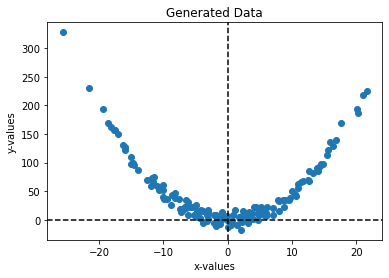

In [126]:
plt.scatter(x_samples, yValues)
plt.axvline(x=0, color='black', linestyle='--')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.title('Generated Data')
plt.show()

vi. Split the data into training, validation and test datasets.

In [127]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(designMatrix_X, yValues, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

print(f"Number of training examples: {x_train.shape[0]}")
print(f"Number of validation examples: {x_val.shape[0]}")
print(f"Number of test examples: {x_test.shape[0]}")

Number of training examples: 90
Number of validation examples: 30
Number of test examples: 30


(b) Now that we have data we can train our models.

i. Use the Moore-Penrose pseudo-inverse to calculate the closed form solution for the model's parameter values.

ii. How close are the learned parameter values to the true parameter values we used to generate the
data?

In [128]:
closed = np.dot(np.linalg.pinv(x_train), y_train)
print("Learned Parameters:", closed)
print("True Parameters:", thTrue)

Learned Parameters: [-0.05762178 -0.11111198  0.48503541]
True Parameters: [ 0.30346136 -0.02991961  0.49536597]


iii. Compute the training error and validation error for the learned regression model.

iv. Create a scatter plot of the individual data points along with the learned regression function,
your plot should look like Figure 2b. Hint: pyplot.plot, this plotting function will give weird
results if the x-values of the data are not sorted. x train[x train[:,1].argsort()] will give you the
design matrix for your training data sorted by the second column (where the x values should be).

Training Error: 62.234960577787476
Validation Error: 48.67647163002906


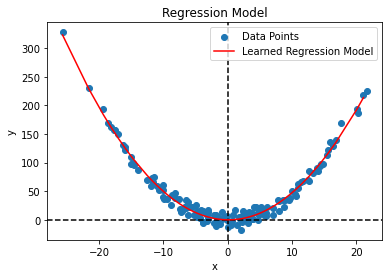

In [129]:
trainingError = np.mean((np.dot(x_train, closed)-y_train)**2)
validationError = np.mean((np.dot(x_val, closed)-y_val)**2)
print("Training Error:", trainingError)
print("Validation Error:", validationError)
sorted = x_train[x_train[:,1].argsort()]
plt.scatter(x_samples, yValues, label="Data Points")
plt.axvline(x=0, color='black', linestyle='--')
plt.axhline(y=0, color='black', linestyle='--')
plt.plot(sorted[:,1], np.dot(sorted, closed), 'r', label="Learned Regression Model")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression Model')
plt.legend()
plt.show()

v. Repeat the above process using Gradient Descent to train your model. In addition, plot the
training error of your regression model over time (observe or capture the training error every 20
parameter updates/time steps). Your plot should look like Figure 2c.

Iteration 0: Training Error = 5772.032324772956
Iteration 20: Training Error = 2099.3645135900833
Iteration 40: Training Error = 789.4768033594556
Iteration 60: Training Error = 322.2927145180849
Iteration 80: Training Error = 155.66533357464277


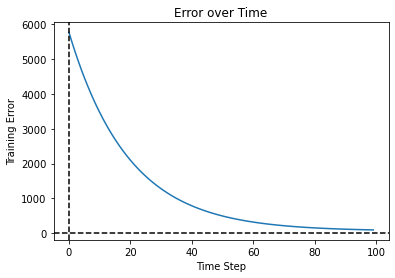

In [130]:
def gradientDescent(matrixX, yTrained, theta, learnRate, numberIterations):
    thetaI = theta
    m = matrixX.shape[0]
    trainErrors = []
    for i in range(numberIterations):
        thetaI = thetaI - (learnRate * ((np.dot(matrixX.T, (np.dot(matrixX, thetaI)) - yTrained)))/m)
        trainError = np.mean(((np.dot(matrixX, thetaI)) - yTrained)**2)
        trainErrors.append(trainError)
        if i % 20 == 0:
            print(f"Iteration {i}: Training Error = {trainError}")
    return thetaI, trainErrors

thetaI = np.zeros(3)
learnRate = 0.000001
numberIterations = 100
thetaGradientDescent, trainErrors = gradientDescent(x_train, y_train, thetaI, learnRate, numberIterations)

plt.plot(np.arange(len(trainErrors)), trainErrors)
plt.axvline(x=0, color='black', linestyle='--')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Time Step')
plt.ylabel('Training Error')
plt.title('Error over Time')
plt.show()


(c) We will now experiment with overfitting and regularization.

i. Begin by appending a third feature to your design matrix for x^3.

In [131]:
xTrain_3 = np.hstack((np.ones((x_train.shape[0], 1)), x_train, np.square(x_train[:, 1]).reshape(-1, 1)))

ii. Train a model using Gradient Descent with the new design matrix. Repeat the process used above
in Question 4b. Note, we are now using a third-order polynomial to fit data which was generated
using a second-order polynomial. Our function is, thus, more complicated than is necessary to
fit the data and as a result will overfit.

In [132]:
thetaI = np.random.uniform(low=-1, high=1, size=xTrain_3.shape[1])
learnRate = 0.000001
numberIterations = 100
thetaGradientDescent_3, trainErrors_3 = gradientDescent(xTrain_3, y_train, thetaI, learnRate, numberIterations)

Iteration 0: Training Error = 78866.78363810589
Iteration 20: Training Error = 9818.586341667931
Iteration 40: Training Error = 1270.5210563676958
Iteration 60: Training Error = 212.28311128734705
Iteration 80: Training Error = 81.2747725679499


iii. Repeat the training process one final time, this time use regularization when training the third-
order polynomial model.

iv. Compare your results of the three gradient descent based models, which model achives the best
final training error? Which model trains the fastest? Which model achieves the best validation
error? Can you see any visible difference in the function approximation (fit of the data) by the
models or in the learned parameter values? Did any of these models achieve a lower training or
validation error than the closed form solution?

In [133]:
def gradientDescentWithRegularization(matrixX, yTrained, theta, learnRate, numberIterations, lambdaReg):
    thetaI = theta
    m = matrixX.shape[0]
    trainErrors = []
    for i in range(numberIterations):
        thetaI = thetaI - (learnRate * ((np.dot(matrixX.T, (np.dot(matrixX, thetaI)) - yTrained)) + lambdaReg * thetaI)/m)
        trainError = np.mean(((np.dot(matrixX, thetaI)) - yTrained)**2)
        trainErrors.append(trainError)
        if i % 20 == 0:
            print(f"Iteration {i}: Training Error = {trainError}")
    return thetaI, trainErrors

thetaI = np.random.uniform(low=-1, high=1, size=4)
learnRate = 0.000001
numberIterations = 100
lambdaReg = 0.001
thetaGradientDescentReg, trainErrorsReg = gradientDescentWithRegularization(xTrain_3, y_train, thetaI, learnRate, numberIterations, lambdaReg)

plt.plot(np.arange(len(trainErrors)), trainErrors, label='Second-order polynomial')
plt.plot(np.arange(len(trainErrors_3)), trainErrors_3, label='Third-order polynomial')
plt.plot(np.arange(len(trainErrorsReg)), trainErrorsReg, label='Third-order polynomial with Regularization')
plt.axvline(x=0, color='black', linestyle='--')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Time Step')
plt.ylabel('Training Error')
plt.title('Error over Time')
plt.legend()
plt.show()
print(f"Second-order polynomial training error: {trainErrors[-1]}")
print(f"Third-order polynomial training error: {trainErrors_3[-1]}")
print(f"Third-order polynomial with regularization training error: {trainErrorsReg[-1]}")

x_plot = np.linspace(-5, 5, 100)
y_plot = thetaGradientDescent[0] + thetaGradientDescent[1]*x_plot + thetaGradientDescent[2]*x_plot**2
plt.plot(x_plot, y_plot, label='Second-order polynomial')
y_plot_3 = thetaGradientDescent_3[0] + thetaGradientDescent_3[1]*x_plot + thetaGradientDescent_3[2]*x_plot**2 + thetaGradientDescent_3[3]*x_plot**3
plt.plot(x_plot, y_plot_3, label='Third-order polynomial')
y_plot_reg = thetaGradientDescentReg[0] + thetaGradientDescentReg[1]*x_plot + thetaGradientDescentReg[2]*x_plot**2 + thetaGradientDescentReg[3]*x_plot**3
plt.plot(x_plot, y_plot_reg, label='Third-order polynomial with regularization')
sort_idx = x_test.argsort(axis=0)
x_test_sorted = x_test[sort_idx]
y_test_sorted = y_test[sort_idx]
plt.scatter(x_test_sorted, y_test_sorted, label='Test data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitted function')
plt.legend()
plt.show()


ValueError: shapes (90,5) and (4,) not aligned: 5 (dim 1) != 4 (dim 0)